### <span style="color:#336699">Análise Exploratória dos Dados</span>
<hr>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import glob, os
from pandas.plotting import parallel_coordinates

In [2]:
data = pd.read_csv('dataset1/dataset_halstead_c.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10383 entries, 0 to 10382
Data columns (total 11 columns):
HALSTEAD_CONTENT       10383 non-null float64
HALSTEAD_DIFFICULTY    10383 non-null float64
HALSTEAD_EFFORT        10383 non-null float64
HALSTEAD_ERROR_EST     10383 non-null float64
HALSTEAD_LENGTH        10383 non-null int64
HALSTEAD_LEVEL         10383 non-null float64
HALSTEAD_PROG_TIME     10383 non-null float64
HALSTEAD_VOLUME        10383 non-null float64
SOFTWARE               10383 non-null int64
LANGUAGE               10383 non-null int64
Defective              10383 non-null int64
dtypes: float64(7), int64(4)
memory usage: 892.4 KB


In [4]:
data.head()

,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,SOFTWARE,LANGUAGE,Defective
0,32.54,9.50,2936.77,0.10,63,0.11,163.15,309.13,0,0,0
1,38.55,21.52,17846.19,0.28,141,0.05,991.46,829.45,0,0,1
2,52.03,12.33,7914.68,0.21,111,0.08,439.70,641.73,0,0,1
3,17.43,2.00,69.74,0.01,11,0.50,3.87,34.87,0,0,0
4,14.62,6.43,604.36,0.03,23,0.16,33.58,94.01,0,0,0


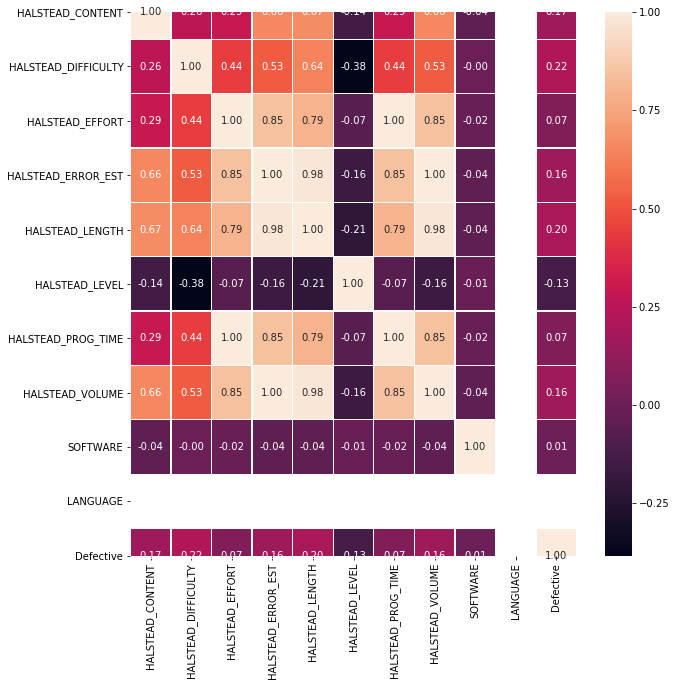

In [5]:
f,ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

In [6]:
data.head()

,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,SOFTWARE,LANGUAGE,Defective
0,32.54,9.50,2936.77,0.10,63,0.11,163.15,309.13,0,0,0
1,38.55,21.52,17846.19,0.28,141,0.05,991.46,829.45,0,0,1
2,52.03,12.33,7914.68,0.21,111,0.08,439.70,641.73,0,0,1
3,17.43,2.00,69.74,0.01,11,0.50,3.87,34.87,0,0,0
4,14.62,6.43,604.36,0.03,23,0.16,33.58,94.01,0,0,0


In [7]:
data.columns

Index(['HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT',
       'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL',
       'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'SOFTWARE', 'LANGUAGE',
       'Defective'],
      dtype='object')

In [ ]:
g = sns.pairplot(data, hue="HALSTEAD_LENGTH")

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


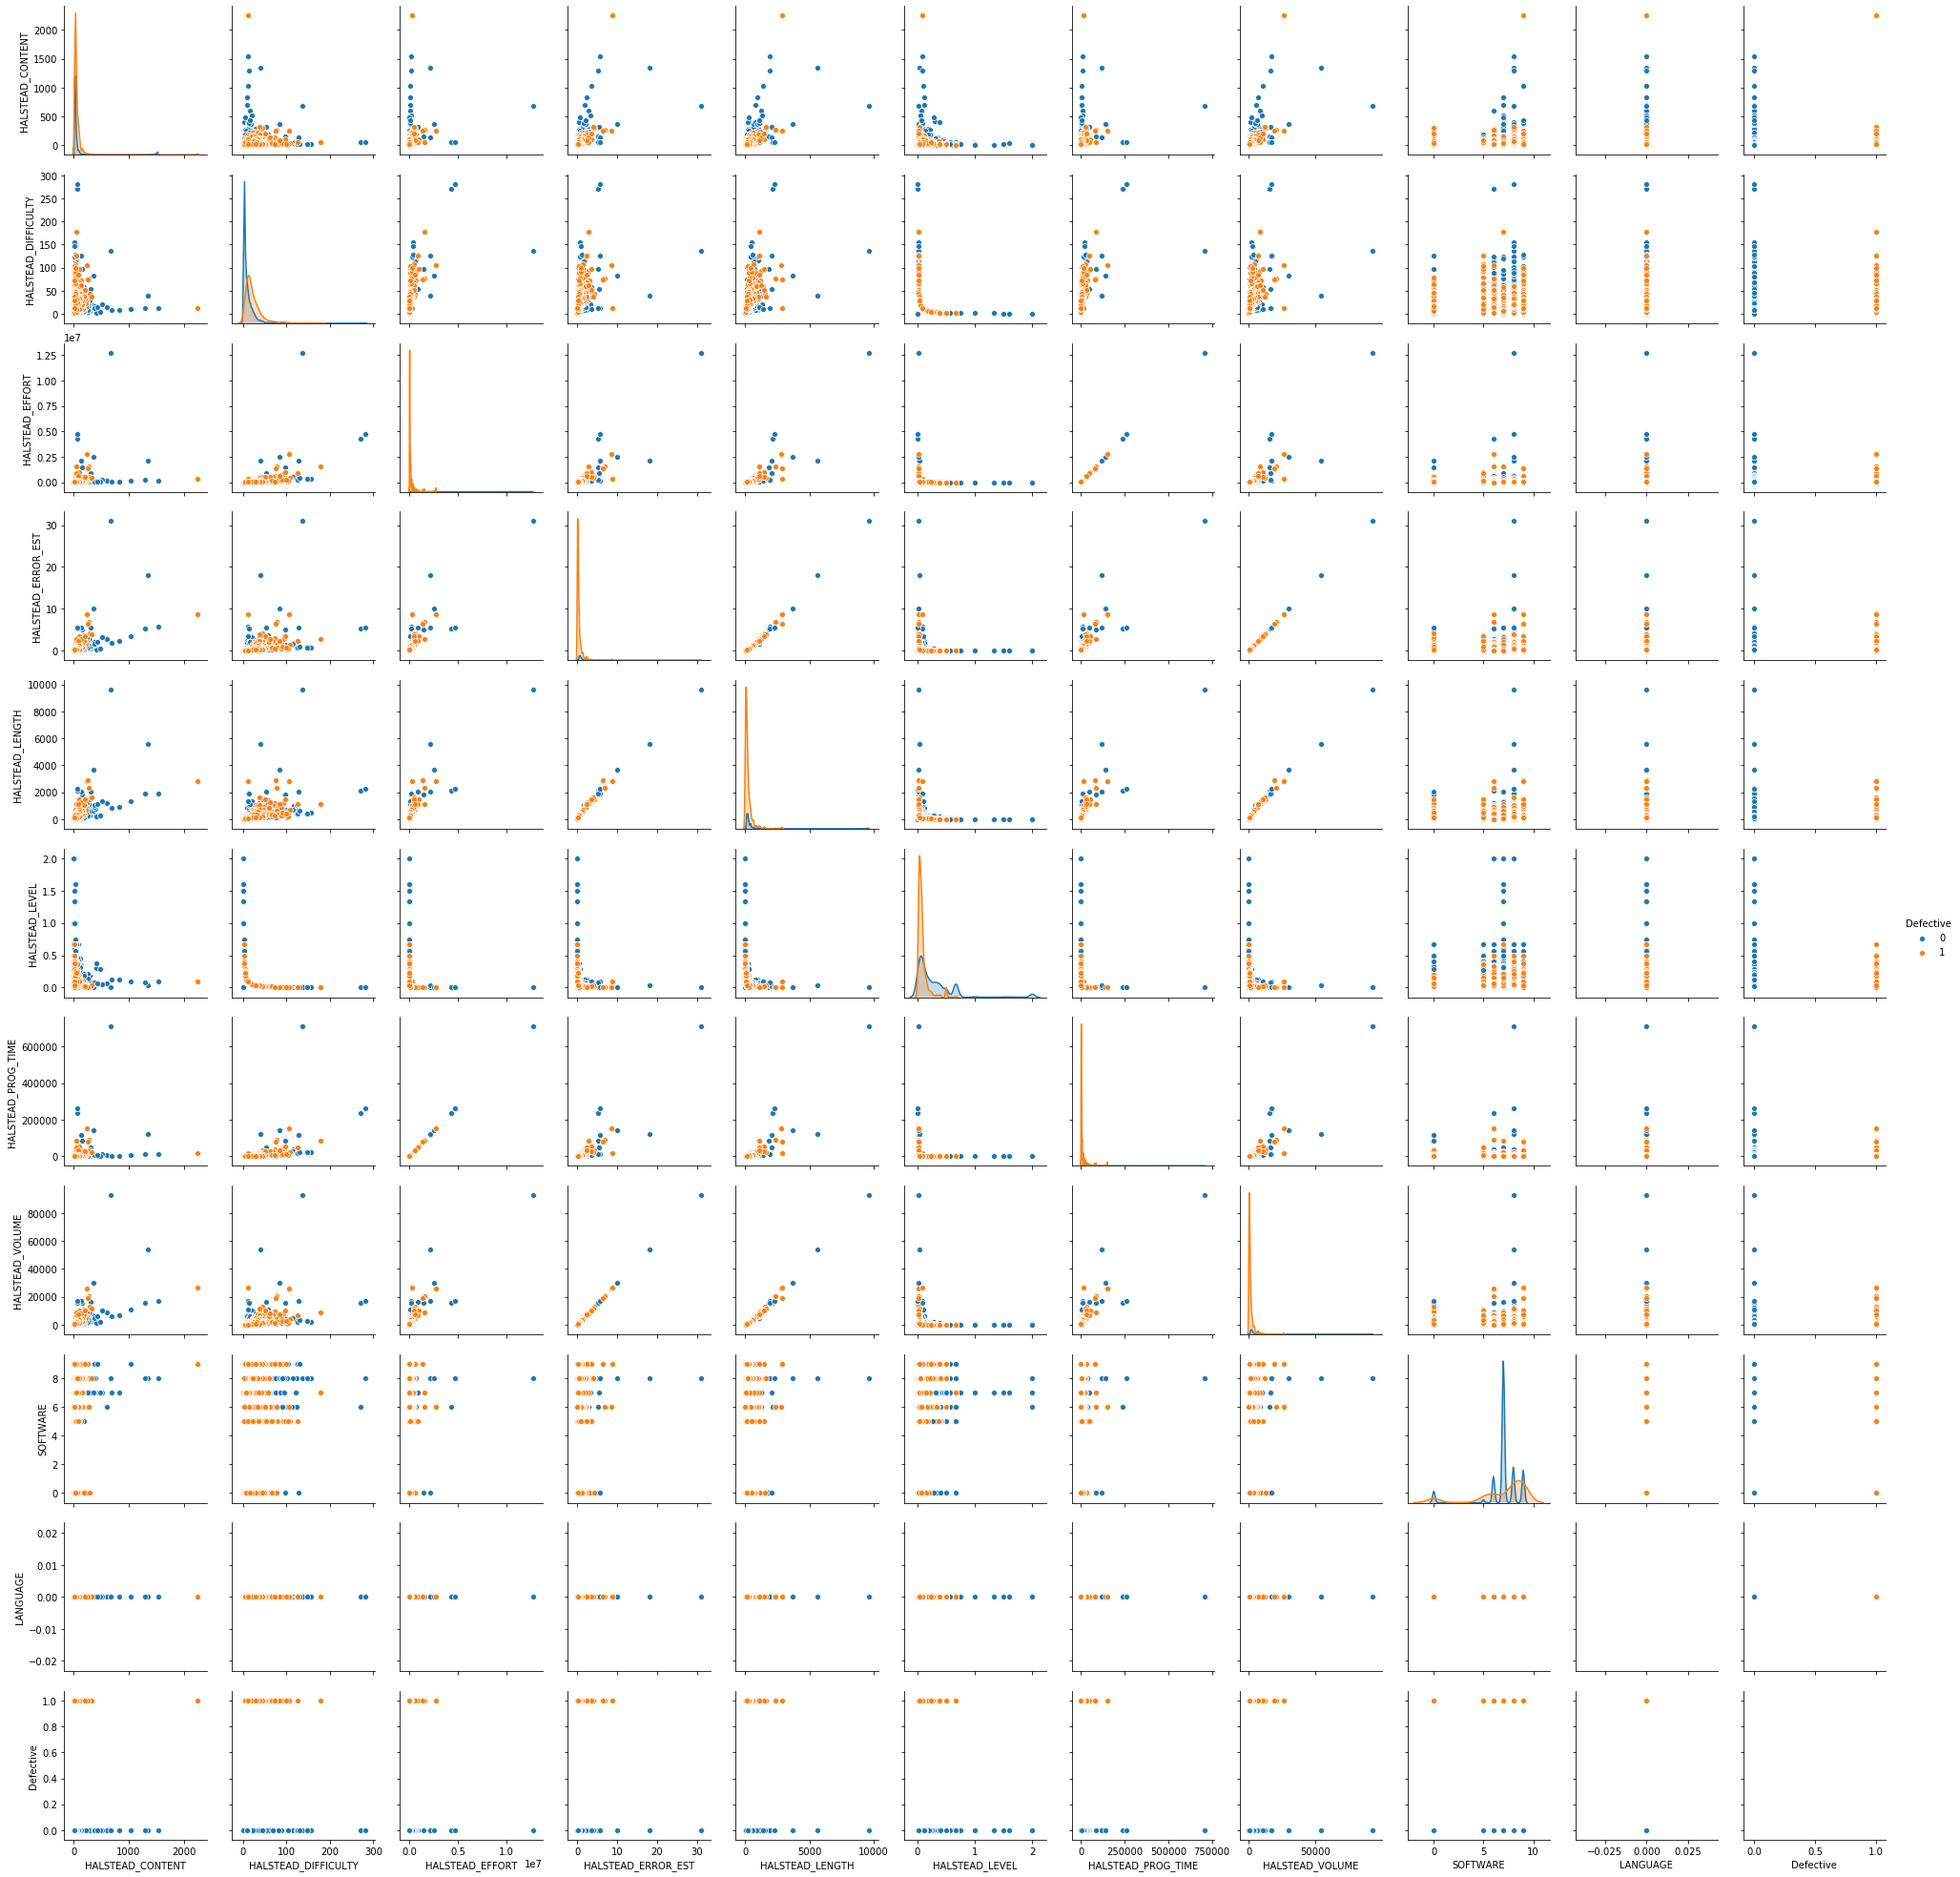

In [9]:
g = sns.pairplot(data, hue="Defective")

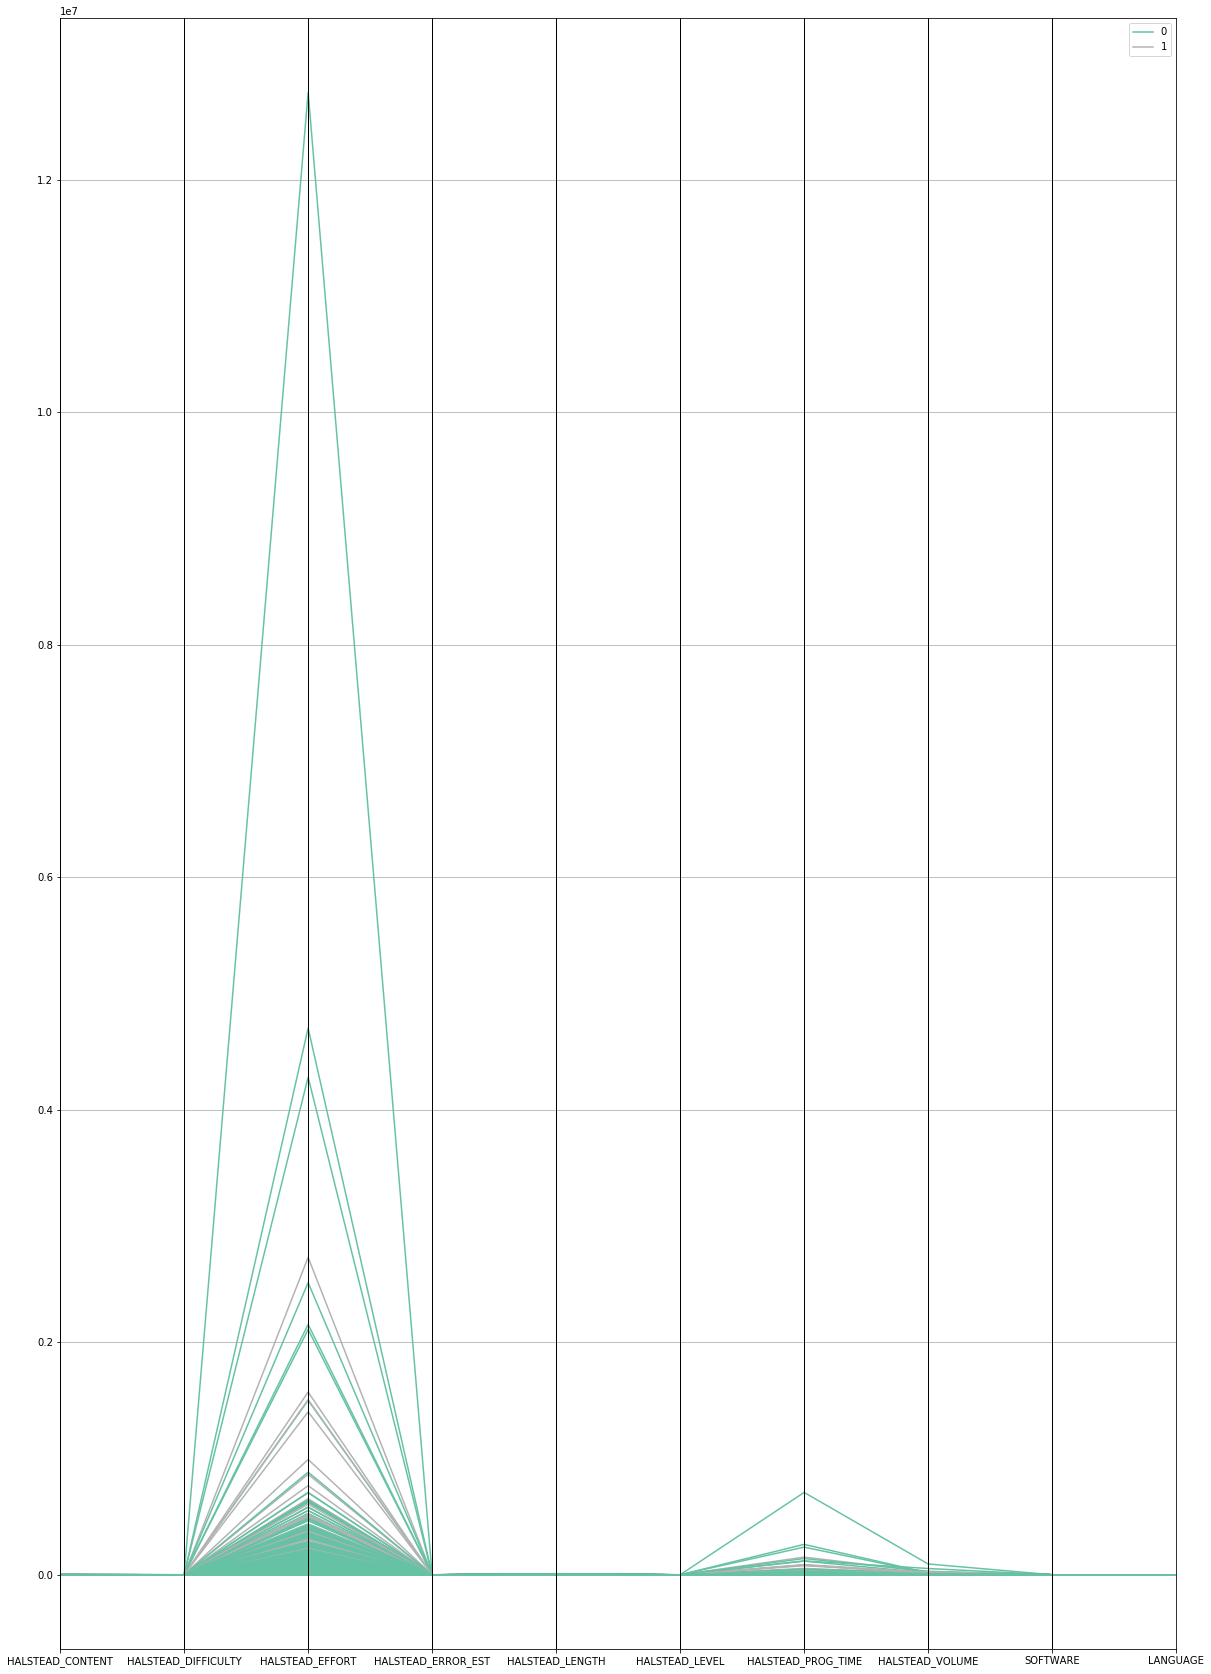

In [10]:
f,ax = plt.subplots(figsize = (20, 30))
parallel_coordinates(data, 'Defective', colormap=plt.get_cmap("Set2"))
plt.show()

In [11]:
newData = data
del newData['HALSTEAD_EFFORT']
del newData['HALSTEAD_PROG_TIME']
del newData['HALSTEAD_VOLUME']

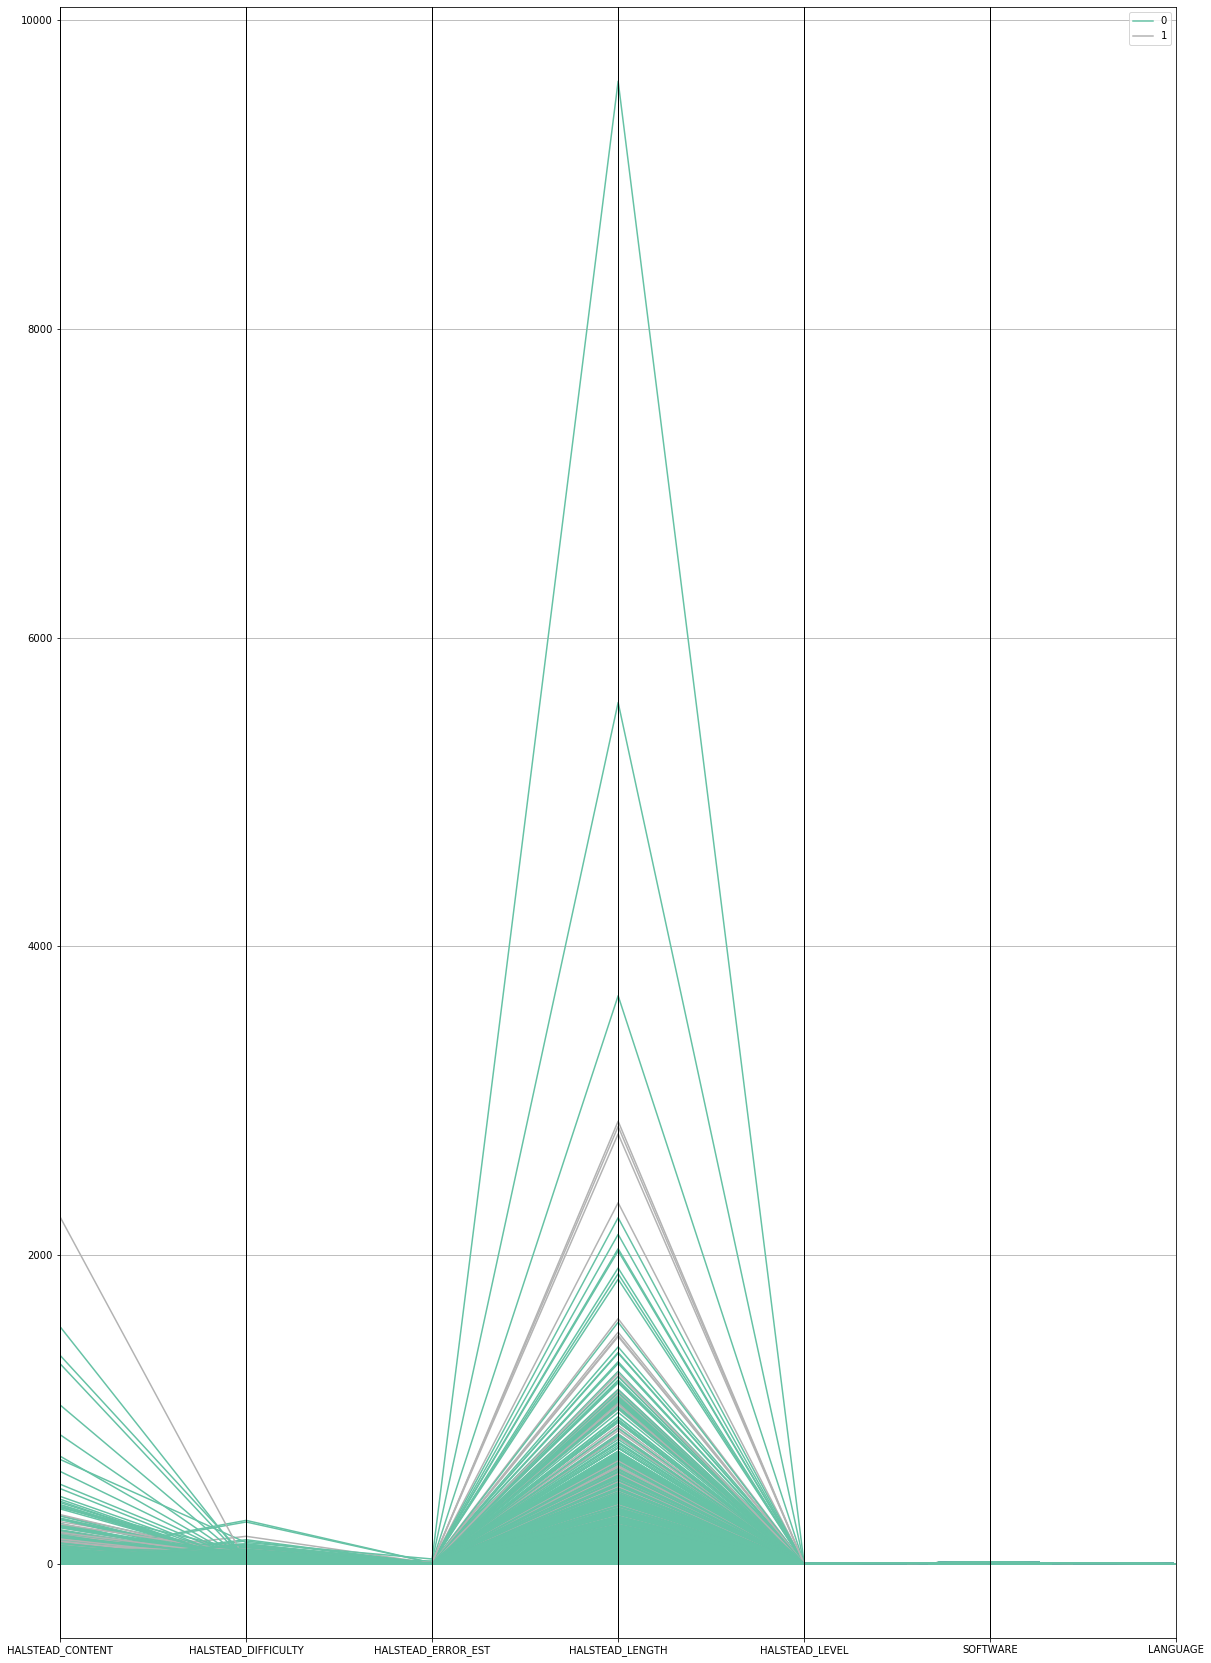

In [12]:
f,ax = plt.subplots(figsize = (20, 30))
parallel_coordinates(newData, 'Defective', colormap=plt.get_cmap("Set2"))
plt.show()

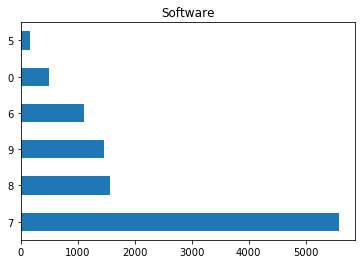

In [14]:
data['SOFTWARE'].value_counts().plot.barh(title="Software")

A relação de observações que apresentaram ou não falha.

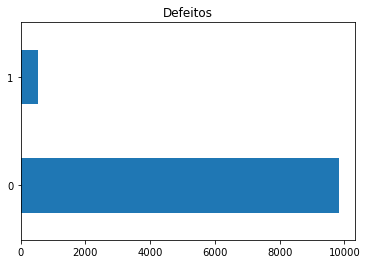

In [15]:
data['Defective'].value_counts().plot.barh(title="Defeitos")

Matriz de correlação dos dados.

## Classificação

In [16]:
from sklearn import tree

In [17]:
classes = data["Defective"]

In [18]:
del data['Defective']

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, classes)

[Text(122.45486277826278, 213.0912, 'X[2] <= 0.145\ngini = 0.098\nsamples = 10383\nvalue = [9846, 537]'),
 Text(54.248245171322566, 204.3936, 'X[0] <= 15.15\ngini = 0.04\nsamples = 8412\nvalue = [8240, 172]'),
 Text(16.714426014840683, 195.696, 'X[5] <= 8.5\ngini = 0.01\nsamples = 5919\nvalue = [5889, 30]'),
 Text(7.63566128328241, 186.9984, 'X[5] <= 5.5\ngini = 0.005\nsamples = 5463\nvalue = [5448, 15]'),
 Text(1.169096464426015, 178.3008, 'X[5] <= 2.5\ngini = 0.068\nsamples = 170\nvalue = [164, 6]'),
 Text(0.5845482322130074, 169.60320000000002, 'gini = 0.0\nsamples = 132\nvalue = [132, 0]'),
 Text(1.7536446966390224, 169.60320000000002, 'X[2] <= 0.025\ngini = 0.266\nsamples = 38\nvalue = [32, 6]'),
 Text(1.169096464426015, 160.9056, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(2.33819292885203, 160.9056, 'X[0] <= 13.775\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(1.7536446966390224, 152.208, 'X[1] <= 7.75\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(1.169096

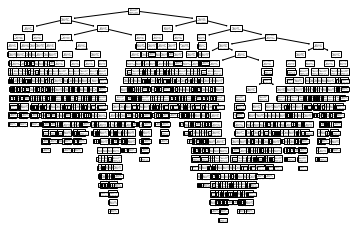

In [20]:
tree.plot_tree(clf.fit(data, classes))

In [21]:
import graphviz
import os

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("Software Defective")

In [ ]:
data.columns

In [ ]:
graph =dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=np.array(data.columns),  
                      class_names=np.array(['OK', 'Defeito']),  
                      filled=True, rounded=True,  
                      special_characters=True)  
dot_data
graph = graphviz.Source(dot_data)  
graph.render("arvore")

### <span style="color:#336699">Referências</span>
<hr>
D. Gray, D. Bowes, N. Davey, Y. Sun and B. Christianson, "The misuse of the NASA metrics data program data sets for automated software defect prediction," 15th Annual Conference on Evaluation & Assessment in Software Engineering (EASE 2011), Durham, 2011, pp. 96-103.
doi: 10.1049/ic.2011.0012
keywords: {data mining;fault tolerant computing;NASA metrics data program data set;automated software defect prediction;data cleansing process},
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6083167&isnumber=6083155